### Now , I will use clean bank data to make model.

In [211]:
#pip install lightgbm

In [212]:
import xgboost as xgb

In [213]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import seaborn as sns

In [214]:
pd.set_option('display.max_columns', 23)

In [215]:
pd.set_option('display.max_rows', 999)

In [376]:
bank_model=pd.read_csv('clean_data.csv')

In [377]:
bank_model.head()

,age,education,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign_33,campaign_34,campaign_35,campaign_37,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_56,y
0,9.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
1,5.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
2,5.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
3,9.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
4,9.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no


In [378]:
 bank_model.index = [x for x in range(1, len(bank_model.values)+1)]

In [379]:
bank_model.index.name = 'id'

In [380]:
bank_model.head()

,age,education,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign_33,campaign_34,campaign_35,campaign_37,campaign_39,campaign_40,campaign_41,campaign_42,campaign_43,campaign_56,y
id,,,,,,,,,,,,,,,,,,,,,,,
1,9.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
2,5.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
3,5.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
4,9.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no
5,9.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,no


In [381]:
bank_model.columns

Index(['age', 'education', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'default_yes',
       'housing_yes', 'loan_yes', 'education_unknown', 'month', 'day_of_week',
       'contact_telephone', 'campaign_2', 'campaign_3', 'campaign_4',
       'campaign_5', 'campaign_6', 'campaign_7', 'campaign_8', 'campaign_9',
       'campaign_10', 'campaign_11', 'campaign_12', 'campaign_13',
       'campaign_14', 'campaign_15', 'campaign_16', 'campaign_17',
       'campaign_18', 'campaign_19', 'campaign_20', 'campaign_21',
       'campaign_22', 'campaign_23', 'campaign_24', 'campaign_25',
       'campaign_26', 'campaign_27', 'campaign_28', 'campaign_29',
       'campaign_30', 'campaign_31', 'campaign_32', 'campaign_33',
       'campaign_34', 'campaign_35', 'campaign_37', 'campaign_39',
       'campa

In [382]:
bank_model['y'].replace(['no', 'yes'], [0,1], inplace=True)

In [383]:
#y = pd.get_dummies(bank_model['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [384]:
bank_model[0:].transpose()

id,1,2,3,4,5,6,7,8,9,10,11,...,30583,30584,30585,30586,30587,30588,30589,30590,30591,30592,30593
age,9.0,5.0,5.0,9.0,9.0,2.0,2.0,2.0,3.0,9.0,4.0,...,9.0,10.0,10.0,5.0,5.0,3.0,12.0,7.0,9.0,6.0,12.0
education,1.0,4.0,2.0,4.0,5.0,5.0,4.0,4.0,4.0,1.0,2.0,...,5.0,6.0,5.0,6.0,6.0,1.0,5.0,5.0,6.0,5.0,5.0
job_blue-collar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
job_entrepreneur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_housemaid,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_management,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_retired,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
job_self-employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_services,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
job_student,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [385]:
feat=bank_model.drop(columns=['y'],axis=1)
label=bank_model['y']

In [386]:
bank_model.shape

(30593, 64)

In [227]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [228]:
X_train, X_test, y_train, y_test = train_test_split(feat,label, test_size = 0.1, random_state = 103)

print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (27533, 63)
y train size:  (27533,)
X test size:  (3060, 63)
y test size:  (3060,)


In [229]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.3, random_state = 103)

print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X val size: ', X_val.shape)
print('y val size: ', y_val.shape)

X train size:  (19273, 63)
y train size:  (19273,)
X val size:  (8260, 63)
y val size:  (8260,)


In [230]:
from sklearn.svm import SVC

In [231]:
from sklearn.metrics import precision_score

In [232]:
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(precision_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[2336  321]
 [ 351   52]]
14.000000000000002


In [233]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,classification_report
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_val)
print(confusion_matrix(y_val, xgbprd ))
print(round(precision_score(y_val, xgbprd),2)*100)
pd.crosstab(y_val,xgbprd)
print(classification_report(y_val,xgbprd))

[[7154   91]
 [ 924   91]]
50.0
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      7245
           1       0.50      0.09      0.15      1015

    accuracy                           0.88      8260
   macro avg       0.69      0.54      0.54      8260
weighted avg       0.84      0.88      0.84      8260



In [234]:
from sklearn.linear_model import LogisticRegression

In [235]:
logmodel = LogisticRegression()

In [236]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [237]:
logpred = logmodel.predict(X_test)

In [238]:

print(confusion_matrix(y_test, logpred))
print(round(precision_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[2657    0]
 [ 403    0]]
0.0


In [239]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(precision_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[2362  295]
 [ 302  101]]
26.0


In [240]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(precision_score(y_test, gbkpred),2)*100)
pd.crosstab(y_test,gbkpred)
print(classification_report(y_test,gbkpred))

[[2620   37]
 [ 372   31]]
46.0
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2657
           1       0.46      0.08      0.13       403

    accuracy                           0.87      3060
   macro avg       0.67      0.53      0.53      3060
weighted avg       0.82      0.87      0.82      3060



In [241]:
print('GradientBoost Reports\n',classification_report(y_test, gbkpred))

GradientBoost Reports
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      2657
           1       0.46      0.08      0.13       403

    accuracy                           0.87      3060
   macro avg       0.67      0.53      0.53      3060
weighted avg       0.82      0.87      0.82      3060



In [242]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(precision_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[2581   76]
 [ 351   52]]
41.0


In [243]:
print('Random forest Reports\n',classification_report(y_test, rfcpred))

Random forest Reports
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.41      0.13      0.20       403

    accuracy                           0.86      3060
   macro avg       0.64      0.55      0.56      3060
weighted avg       0.82      0.86      0.83      3060



In [244]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(precision_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[  56 2601]
 [   2  401]]
13.0


In [245]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(precision_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'precision').mean())

[[2647   10]
 [ 392   11]]
52.0


#### We observe that XGBoost and  Gradient Boosting performance are best so now we will tune hyperparameter for XGBoost and Gradient Boosting

#### Training and tuning of XGBoost model
 #### Parameter dictionary

In [246]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### I tried to change some hyper parameters and this increased precision from 0.55 to 0.8

In [247]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,classification_report
xgb = XGBClassifier(max_depth=3,colsample_bylevel=0.3,
              colsample_bynode=0.3,min_child_weight=1,learning_rate=0.05,n_estimators=100,reg_alpha=0,reg_lambda=0.5,scale_pos_weight=8,
                   random_state=1)
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_val)
xgbprd_train=xgb.predict(X_train)
print('Train Precision',precision_score(y_train, xgbprd_train ))
print('Test Precision',precision_score(y_val, xgbprd ))

Train Precision 0.18346697212676594
Test Precision 0.1739808420583649


In [248]:
print('XGBoost Reports\n',classification_report(y_val, xgbprd))

XGBoost Reports
               precision    recall  f1-score   support

           0       0.94      0.49      0.64      7245
           1       0.17      0.77      0.28      1015

    accuracy                           0.52      8260
   macro avg       0.56      0.63      0.46      8260
weighted avg       0.84      0.52      0.60      8260



#### Tuning the hyperparameter for XGBoost via grid search

In [249]:
#from sklearn.model_selection import GridSearchCV

In [250]:
from sklearn.model_selection import cross_val_score

In [251]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

[0.08548278 0.02006105 0.03995923 0.01205416 0.00183127 0.00297162
 0.07418204 0.00713085 0.02431052 0.07124001 0.01007248 0.01300775
 0.00395016 0.00656354 0.01612283 0.         0.00295326 0.00528017
 0.         0.16295122 0.01652703 0.27780846 0.00180324 0.00078272
 0.00539968 0.01393103 0.00921441 0.00897162 0.01178411 0.00486976
 0.00963125 0.00607676 0.01472212 0.00612518 0.00336056 0.00580259
 0.00793121 0.00258812 0.00475515 0.00435983 0.00420073 0.00427328
 0.00342915 0.004084   0.00256784 0.         0.         0.
 0.0020629  0.00281232 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


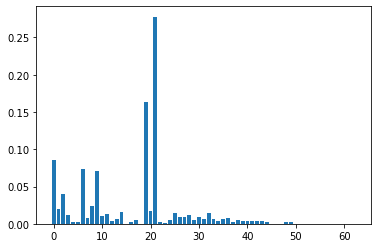

In [252]:
from matplotlib import pyplot
# feature importance
print(xgb.feature_importances_)
# plot
pyplot.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
pyplot.show()

In [253]:
from xgboost import plot_importance

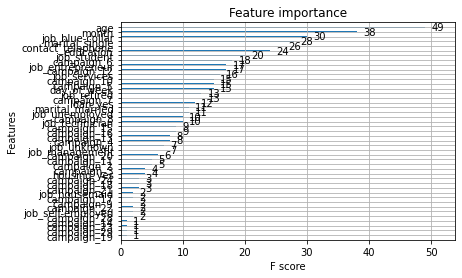

In [254]:
plot_importance(xgb)
pyplot.show()

In [255]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

In [256]:
# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_xgb = XGBClassifier()
	selection_xgb.fit(select_X_train, y_train)
	# eval model
	select_X_val = selection.transform(X_val)
	predictions = selection_xgb.predict(select_X_val)
	precision = precision_score(y_val, predictions)
	print("Thresh=%.3f, n=%d, precision: %.2f%%" % (thresh, select_X_train.shape[1], precision*100.0))

Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.000, n=63, precision: 50.00%
Thresh=0.001, n=45, precision: 50.00%
Thresh=0.002, n=44, precision: 50.00%
Thresh=0.002, n=43, precision: 50.00%
Thresh=0.002, n=42, precision: 50.00%
Thresh=0.003, n=41, precision: 50.00%
Thresh=0.003, n=40, precision: 50.00%
Thresh=0.003, n=39, precision: 50.00%
Thresh=0.003, n=38, precision: 50.00%
Thresh=0.003

In [257]:
from sklearn.model_selection import RandomizedSearchCV

In [496]:
param_rs = {'learning_rate':[0.1,0.05,0.01], 'n_estimators':[100,250],'max_depth':[3,4,5,6],
           'colsample_bylevel':[0.2,0.3,0.35], 'colsample_bynpde':[0.2,0.3,0.35],'max_features':[12,15,20],
           'subsample':[0.75,0.8,0.85,0.9],'scale_pos_weight':[6,7,8,9],'reg_lambda':[0.4,0.5,0.6],
                                                               'min_child_weight':[1,5,50]}

rs=RandomizedSearchCV(XGBClassifier(),param_rs,cv=5)
rs_result=rs.fit(X_train,y_train)
rsprd = rs.predict(X_val)
rsprd_train=rs.predict(X_train)
print('Train Precision',precision_score(y_train, rsprd_train ))
print('Test Precision',precision_score(y_val, rsprd ))

Train Precision 0.27859696157283287
Test Precision 0.2520107238605898


In [497]:
from sklearn.datasets import make_classification

In [498]:
print("Best: %f using %s" % (rs_result.best_score_, rs_result.best_params_))

Best: 0.778550 using {'subsample': 0.85, 'scale_pos_weight': 6, 'reg_lambda': 0.5, 'n_estimators': 100, 'min_child_weight': 1, 'max_features': 15, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bynpde': 0.3, 'colsample_bylevel': 0.35}


In [499]:
print('XGBoost Reports\n',classification_report(y_val, rsprd))

XGBoost Reports
               precision    recall  f1-score   support

           0       0.91      0.81      0.86      7245
           1       0.25      0.46      0.33      1015

    accuracy                           0.77      8260
   macro avg       0.58      0.64      0.59      8260
weighted avg       0.83      0.77      0.79      8260



#### I used tuned hyperparameter to rum XGBoost model with X_test and y_test.

In [500]:
xgb = XGBClassifier(subsample=0.9,scale_pos_weight=6,reg_lambda=0.6,n_estimators=100,min_child_weight=5,
                    max_features=11,max_depth=6,learning_rate=0.1,colsample_bynpde=0.35, 
                    colsample_bylevel=0.35)
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)
xgbprd_train=xgb.predict(X_train)
print('Train Precision',precision_score(y_train, xgbprd_train ))
print('Test Precision',precision_score(y_test, xgbprd ))

Train Precision 0.36278717495581925
Test Precision 0.3368421052631579


In [501]:
print('XGBoost Reports\n',classification_report(y_test,xgbprd ))

XGBoost Reports
               precision    recall  f1-score   support

           0       0.93      0.83      0.88      2657
           1       0.34      0.56      0.42       403

    accuracy                           0.80      3060
   macro avg       0.63      0.69      0.65      3060
weighted avg       0.85      0.80      0.82      3060



#### Now, I will find probability y_test using X_test.

In [847]:
y_predict_proba=xgb.predict_proba(X_test)

In [848]:
y_predict_proba=pd.DataFrame(y_predict_proba,index=X_test.index)

In [849]:
y_predict_proba.head()

,0,1
id,,
24745,0.562736,0.437264
29502,0.262713,0.737287
6749,0.766069,0.233931
10118,0.696965,0.303035
6442,0.716029,0.283971


In [850]:
y_predict_proba=y_predict_proba.drop(0,axis=1)

In [851]:
y_predict_proba=pd.DataFrame(y_predict_proba, index=X_test.index)

In [852]:
y_predict_proba.shape

(3060, 1)

In [853]:
bank_churn=pd.concat([y_predict_proba,y_test],axis=1)

In [854]:
bank_churn=bank_churn.sort_values(by=1,ascending=False)

In [855]:
bank_churn.head()

,1,y
id,,
28904,0.930926,1
19548,0.929105,1
28861,0.925764,1
19527,0.923850,1
28304,0.923370,1


In [856]:
bank_churn['DecileRank']=pd.qcut(bank_churn[1],q=10,labels=False)

In [857]:
bank_churn.head()

,1,y,DecileRank
id,,,
28904,0.930926,1,9
19548,0.929105,1,9
28861,0.925764,1,9
19527,0.923850,1,9
28304,0.923370,1,9


In [858]:
cust_9=bank_churn[bank_churn['DecileRank']==9]['id']

KeyError: 'id'

In [859]:
bank_churn['DecileRank'].unique()

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [860]:
bank_churn.shape

(3060, 3)

In [861]:
bank_churn=bank_churn.groupby('DecileRank')[1].mean()

In [862]:
bank_churn=pd.DataFrame(bank_churn)

In [863]:
bank_churn.head(10)

,1
DecileRank,
0,0.119883
1,0.180107
2,0.233658
3,0.290990
4,0.354354
5,0.398384
6,0.436859
7,0.482360
8,0.590630


In [864]:
bank_churn=bank_churn.rename(columns={'DecileRank':'Decile',1:'churnrate'})

In [865]:
bank_churn.head(10)

,churnrate
DecileRank,
0,0.119883
1,0.180107
2,0.233658
3,0.290990
4,0.354354
5,0.398384
6,0.436859
7,0.482360
8,0.590630


In [866]:
freq_pos = (bank_model.y.values == 1).sum()


In [867]:
freq_pos

3873

In [868]:
freq_neg = (bank_model.y.values == 0).sum()

In [869]:
freq_neg

26720

In [870]:
baseline_churn=freq_pos/(freq_pos+freq_neg)

In [871]:
baseline_churn=round(baseline_churn,2)

In [872]:
baseline_churn

0.13

In [873]:
lift = (bank_churn['churnrate']-0.13)/0.13

In [874]:
lift

DecileRank
0   -0.077823
1    0.385439
2    0.797373
3    1.238385
4    1.725802
5    2.064491
6    2.360456
7    2.710459
8    3.543306
9    5.204618
Name: churnrate, dtype: float32

In [875]:
bank_churn['lift']=lift

In [876]:
bank_churn.head(10)

,churnrate,lift
DecileRank,,
0,0.119883,-0.077823
1,0.180107,0.385439
2,0.233658,0.797373
3,0.290990,1.238385
4,0.354354,1.725802
5,0.398384,2.064491
6,0.436859,2.360456
7,0.482360,2.710459
8,0.590630,3.543306


In [877]:
bank_churn.columns

Index(['churnrate', 'lift'], dtype='object')

In [878]:
bank_churn['DecileRank']=bank_churn.index

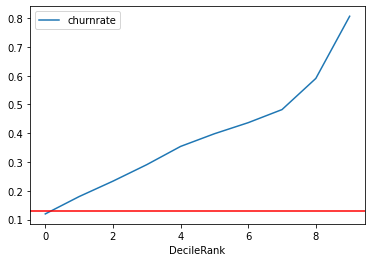

In [879]:
bank_churn=bank_churn.plot(x='DecileRank',y='churnrate')
plt.axhline(y=0.13, color='r', linestyle='-')
plt.show()

### I recommend we apply the treatment to the top _9th decile. This will result in saving  67% of customers who would have otherwise churned. This is a 500% improvement over randomly applying treatment to the same number of customers. 